In [2]:
# https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

import openpyxl
xlsx = openpyxl.load_workbook('bp-stats-review-2021-all-data.xlsx')

In [79]:
for index, value in enumerate(xlsx.sheetnames):
    if value != 'Contents' and type(xlsx.worksheets[type_index].cell(3, 2).value) == int:
        print(f'{value} [{xlsx.worksheets[index].cell(3, 1).value}]')
        #print(f'{value} [{xlsx.worksheets[index].cell(3, 2).value}]')

Primary Energy Consumption [Exajoules]
Primary Energy - Cons by fuel [Exajoules]
Primary Energy - Cons capita [Gigajoule per capita]
Carbon Dioxide Emissions [Million tonnes of carbon dioxide]
Natural Gas Flaring [Billion cubic metres]
CO2 From Flaring [Million tonnes of carbon dioxide]
CO2 Excluding Flaring [Million tonnes of carbon dioxide]
Oil - Proved reserves [None]
Oil - Proved reserves history [Thousand million barrels]
Oil Production - Barrels [Thousand barrels daily]
Oil Production - Tonnes [Million tonnes]
Oil Production - Crude Conds [Thousand barrels daily]
Oil Production - NGLs [Thousand barrels daily]
Total Liquids - Consumption [Thousand barrels daily]
Oil Consumption - Barrels [Thousand barrels daily]
Oil Consumption - Tonnes [Million tonnes]
Oil Consumption - EJ [Exajoules]
Oil - Regional Consumption  [Thousand barrels daily]
Oil - Spot crude prices [None]
Oil - Crude prices since 1861 [US dollars per barrel]
Oil - Refinery throughput [Thousand barrels daily*]
Oil - Re

In [118]:
# Type
types = []
for index, value in enumerate(xlsx.sheetnames):

    #if value not in ['Contents', 'Approximate conversion factors', 'Definitions', 'Methodology'] \
    #        and type(xlsx.worksheets[type_index].cell(3, 2).value) == int:
        
    if xlsx.worksheets[index].cell(3, 1).value in ['Exajoules', 'Petajoules', 'Exajoules (input-equivalent)', 'Terawatt-hours']:
        values_split = value.split(' ')
        if 'Generation' in values_split:
            types.append({
                    'label': value,
                    'index': index
                })
        if 'Capacity' in values_split:
            types.append({
                    'label': value,
                    'index': index
                })
        if 'Consumption' in values_split:
            types.append({
                    'label': value,
                    'index': index
                })
for t in types_:
    print(t['label'])

Primary Energy Consumption
Primary Energy Consumption
Oil Consumption - EJ
Gas Consumption - EJ
Coal Consumption - EJ
Nuclear Generation - TWh
Nuclear Consumption - EJ
Hydro Generation - TWh
Hydro Consumption - EJ
Renewables Consumption - EJ
Renewables Generation by source
Solar Generation - TWh
Solar Consumption - EJ
Wind Generation - TWh
Wind Consumption - EJ
Biofuels Consumption - PJ
Electricity Generation 
Geothermal Capacity
Solar Capacity
Wind Capacity


In [125]:
import re
import pandas as pd

values = {"values": [], "type": [], "unit": [], "type unit": [], "year": [], "region": []}
for type_ in types:
    type_index = type_['index']
    type_label = type_['label']
    # Year
    years = []
    index = 2
    re_ = re.compile('^[0-9]+$')
    while True:
        value = xlsx.worksheets[type_index].cell(3, index).value
        if xlsx.worksheets[type_index].cell(2, index).value is not None:
            break
        years.append({
            'label': value,
            'index': index
        })
        index += 1

    # Country
    regions = []
    index = 5
    while True:
        value = xlsx.worksheets[type_index].cell(index, 1).value
        if value is not None and value == 'Switzerland':
            regions.append({
                'label': value,
                'index': index
            })
        if value == 'Total World':
            break
        index += 1

    for year in years:
        for region in regions:
            value = xlsx.worksheets[type_index].cell(region['index'], year['index']).value
            if type_label.endswith(' - TWh'):
                type_label = type_label[:-6]
            if type_label.endswith(' - EJ'):
                type_label = type_label[:-5]
            if type_label.endswith(' - PJ'):
                type_label = type_label[:-5]

            unit = xlsx.worksheets[type_index].cell(3, 1).value
            if unit == 'Terawatt-hours':
                if value is not None and type(value) != str:
                    value = value * 3.6
                unit = 'Petajoules'
            if unit == 'Exajoules':
                if value is not None and type(value) != str:
                    value = value * 1000
                unit = 'Petajoules'
            if unit == 'Exajoules (input-equivalent)':
                if value is not None and type(value) != str:
                    value = value * 1000
                unit = 'Petajoules (input-equivalent)'

            values['values'].append(value)
            values['year'].append(year['label'])
            values['region'].append(region['label'])
            values['type'].append(type_label)
            values['unit'].append(unit)
            values['type unit'].append(f'{type_label} [{unit}]')

df = pd.DataFrame(values)
df

,values,type,unit,type unit,year,region
0,641.339269,Primary Energy Consumption,Petajoules,Primary Energy Consumption [Petajoules],1965,Switzerland
1,688.221126,Primary Energy Consumption,Petajoules,Primary Energy Consumption [Petajoules],1966,Switzerland
2,734.738985,Primary Energy Consumption,Petajoules,Primary Energy Consumption [Petajoules],1967,Switzerland
3,772.910947,Primary Energy Consumption,Petajoules,Primary Energy Consumption [Petajoules],1968,Switzerland
4,800.908432,Primary Energy Consumption,Petajoules,Primary Energy Consumption [Petajoules],1969,Switzerland
...,...,...,...,...,...,...
818,222.732000,Electricity Generation,Petajoules,Electricity Generation [Petajoules],2016,Switzerland
819,222.584407,Electricity Generation,Petajoules,Electricity Generation [Petajoules],2017,Switzerland
820,243.431093,Electricity Generation,Petajoules,Electricity Generation [Petajoules],2018,Switzerland
821,259.402784,Electricity Generation,Petajoules,Electricity Generation [Petajoules],2019,Switzerland


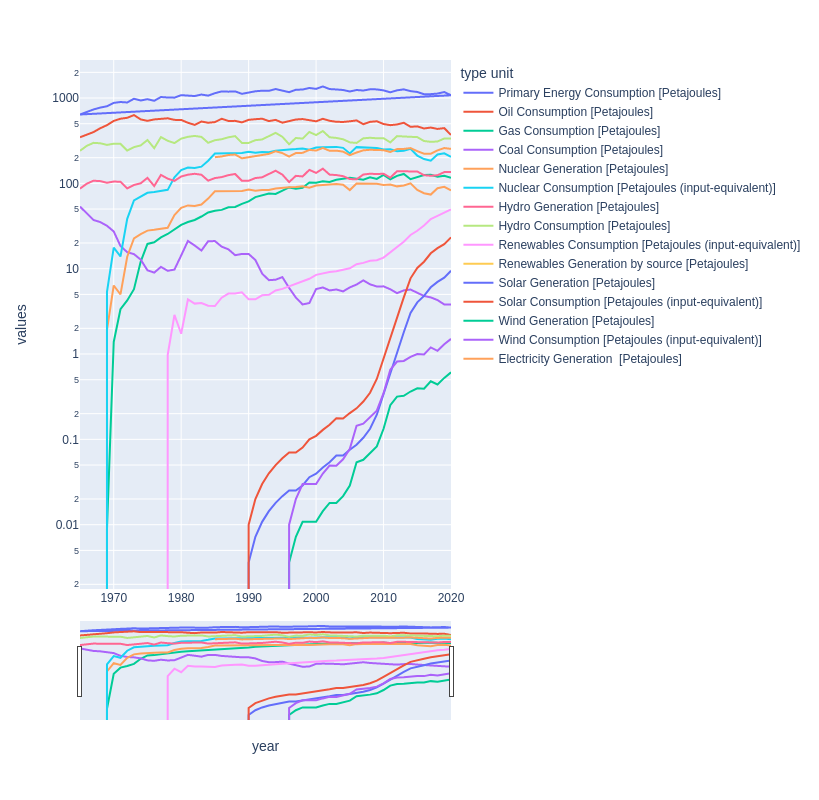

In [126]:
import plotly.express as px

fig = px.line(df, x="year", y="values", color='type unit',
                 width=800, height=800)
fig.update_layout(yaxis_type="log",
    xaxis = {
        'rangeslider': {
            'visible': True
        },
    }
)
fig.show()